In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


In [3]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X.shape, y.shape


((569, 30), (569,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    "Naive Bayes": GaussianNB()
}


In [7]:
def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_te)[:, 1]
    else:
        y_prob = model.decision_function(X_te)

    return {
        "Accuracy": accuracy_score(y_te, y_pred),
        "Precision": precision_score(y_te, y_pred),
        "Recall": recall_score(y_te, y_pred),
        "F1": f1_score(y_te, y_pred),
        "ROC-AUC": roc_auc_score(y_te, y_prob)
    }


In [8]:
results = []

for name, model in models.items():
    if name in ["KNN", "SVM (RBF)", "Logistic Regression"]:
        metrics = evaluate_model(
            model,
            X_train_scaled,
            X_test_scaled,
            y_train,
            y_test
        )
    else:
        metrics = evaluate_model(
            model,
            X_train,
            X_test,
            y_train,
            y_test
        )

    metrics["Model"] = name
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df


,Accuracy,Precision,Recall,F1,ROC-AUC,Model
0,0.982456,0.986111,0.986111,0.986111,0.995370,Logistic Regression
1,0.956140,0.958904,0.972222,0.965517,0.978836,KNN
2,0.982456,0.986111,0.986111,0.986111,0.995040,SVM (RBF)
3,0.956140,0.958904,0.972222,0.965517,0.993717,Random Forest
4,0.938596,0.945205,0.958333,0.951724,0.987765,Naive Bayes


In [9]:
results_df.set_index("Model").round(4)


,Accuracy,Precision,Recall,F1,ROC-AUC
Model,,,,,
Logistic Regression,0.9825,0.9861,0.9861,0.9861,0.9954
KNN,0.9561,0.9589,0.9722,0.9655,0.9788
SVM (RBF),0.9825,0.9861,0.9861,0.9861,0.9950
Random Forest,0.9561,0.9589,0.9722,0.9655,0.9937
Naive Bayes,0.9386,0.9452,0.9583,0.9517,0.9878


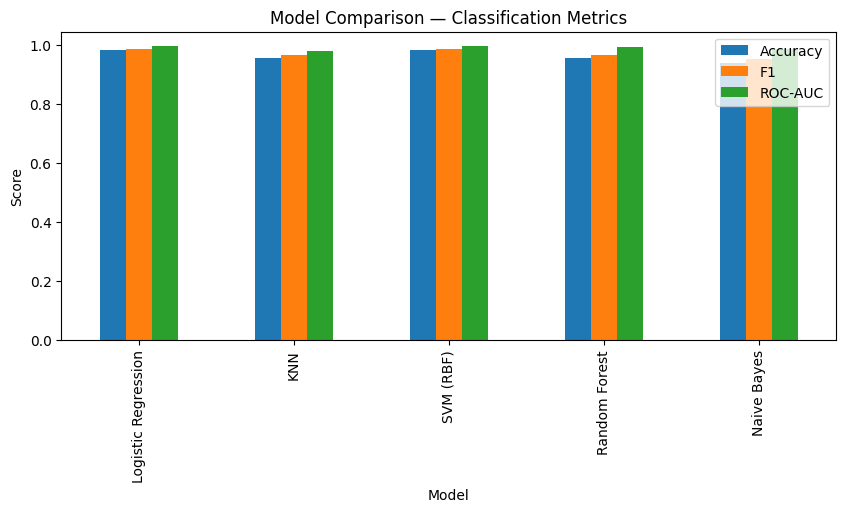

In [12]:
results_df.set_index("Model")[["Accuracy", "F1", "ROC-AUC"]].plot(
    kind="bar",
    figsize=(10,4)
)
plt.title("Model Comparison — Classification Metrics")
plt.ylabel("Score")
plt.show()
